---

<center><h1>Online Retail Customer Segmentation RFM Analysis</h1></center>

---

## Process Flow of Project

1. Understanding Problem Statement
2. Understanding concept of RFM Analysis
3. Getting System Ready
4. Understanding the Data-Data Eyeballing & Data Description
5. Data Cleaning & Preprocessing
6. RFM Metrics & Scores Calculation
7. Segmenting Customers based RFM Scores **(Manual Approach - Without Model Buidling)**
8. Model Buidling & Evaluation
9. Selection of Best Model & Hyperparameter Tuninng
10. Generating Pickle file

## 1) Understanding Problem Statement
---

### Problem Statement:
Online retailers have a vast customer base with diverse shopping behaviors. To enhance marketing strategies and customer engagement, there is a need to segment customers into distinct groups based on their recency, frequency and monetary (RFM) characteristics. This project aims to segment customers effectively to provide tailored marketing campaigns and improve overall business performance.

### Approach:
Given that the data is already available, the approach involves preprocessing the existing online retail transaction data, calculating **RFM metrics*, applying **K-Means** and **Hierarchical clustering** for customer segmentation, interpreting and labeling clusters and using insights to optimize marketing strategies and enhance customer engagement.

### Objective:
To effectively segment online retail customers based on their RFM characteristics using clustering techniques (K-Means and Hierarchical) to improve targeted marketing, boost revenue, enhance customer retention, optimize inventory management and increase overall customer satisfaction.

### Benefits:
The benefits of this solution include:

- **Improved Customer Engagement:** Tailored marketing campaigns and personalized recommendations for each customer segment lead to higher engagement and conversion rates.

- **Increased Revenue:** Targeting high-value customer segments with the right offers can boost sales and revenue.

- **Customer Retention:** Identifying at-risk and churned customer segments allows for proactive retention efforts.

- **Resource Optimization:** Efficient allocation of resources in inventory management and marketing efforts based on customer preferences.

- **Enhanced Customer Satisfaction:** Providing customers with products and offers that match their preferences leads to higher satisfaction and loyalty.

- **Data-Driven Decision Making:** The project promotes data-driven decision-making, helping the company adapt to changing customer behaviors and market trends.

- **Competitive Advantage:** The ability to understand and cater to customer segments better can provide a competitive edge in the online retail industry.

## 2) Understanding concept of RFM Analysis
---

### Recency Frequency Monetary (RFM) Analysis

RFM Analysis is a **customer segmentation technique** used by businesses to better understand and categorize their customers based on their **past purchasing behavior**. This approach helps companies identify and target specific customer groups for marketing and personalization efforts. Here's a breakdown of the three components of RFM Analysis:

1. **Recency (R):** Recency refers to **how recently a customer has made a purchase or interacted with your business**. It is typically measured in terms of the **number of days since the last purchase or interaction**. Customers who have engaged with your business **more recently** are often considered **more valuable** because they are more likely to make repeat purchases.

   - Example: A customer who made a purchase 3 days ago is considered more recent than a customer who made a purchase 3 months ago.

2. **Frequency (F):** Frequency measures **how often a customer makes purchases or interacts with your business** over a specific period such as a year. It represents **customer loyalty and engagement**. Customers who buy from you frequently are more likely to be loyal and responsive to promotions.

   - Example: A customer who makes monthly purchases is considered more frequent than a customer who makes annual purchases.

3. **Monetary (M):** Monetary represents the **total amount of money a customer has spent on your products or services**. It helps determine the **value or profitability of each customer**. Customers who have **spent more money** are typically considered **high-value customers**.

   - Example: A customer who has spent Rs. 1,000 with your business is considered more valuable than a customer who has spent Rs. 100.

<br>

### Approach behind RFM Analysis

RFM Analysis involves **scoring or ranking** customers based on these three dimensions. Each dimension is typically divided into **categories or percentiles** (e.g. quintiles or deciles) and customers are assigned scores or labels based on where they fall within these categories. For example, you might score recency from 1 to 5, with 5 being the most recent and do the same for frequency and monetary value. Once customers are assigned RFM scores, they can be segmented into different groups. These segments can then be used for various marketing and customer engagement strategies such as:

- **Targeted marketing campaigns:** Focus marketing efforts on high RFM-score segments that are more likely to respond positively.
- **Customer retention:** Identify at-risk customers (e.g. low frequency or monetary value) and implement strategies to retain them.
- **Personalization:** Tailor product recommendations or content to match the preferences and behavior of each segment.
- **Product development:** Use RFM insights to inform product or service offerings for different customer segments.

<br>

### Real Life Industry Applications

1. **Retail Industry:**
   - **Promotion Targeting:** Retailers use RFM segments to identify high-value customers who are more likely to respond positively to discounts and promotions. They can then tailor their marketing campaigns to specifically target these segments.
   - **Inventory Management:** RFM can help retailers manage inventory by understanding which products are most popular among different customer segments. This information helps optimize stock levels and product placement.

2. **E-commerce:**
   - **Personalized Recommendations:** Online retailers use RFM data to provide personalized product recommendations to customers based on their past behavior, increasing the likelihood of additional purchases.
   - **Cart Abandonment Recovery:** RFM can help identify customers who frequently abandon their shopping carts. Retailers can then send targeted follow-up emails or incentives to encourage them to complete their purchases.

3. **Hospitality and Tourism:**
   - **Customer Loyalty Programs:** Hotels and airlines use RFM analysis to reward loyal customers with special offers, upgrades or discounts thereby encouraging repeat bookings.
   - **Seasonal Pricing:** Understanding the recency and frequency of bookings allows businesses in this sector to adjust pricing strategies for different seasons and periods of high demand.

4. **Financial Services:**
   - **Risk Assessment:** Banks and insurance companies use RFM Analysis to assess customer risk. Customers who exhibit erratic behavior in terms of recency, frequency and monetary transactions may be flagged for further review.
   - **Cross-Selling:** Financial institutions can identify opportunities to cross-sell or upsell products and services to customers based on their RFM profiles.

5. **Subscription Services:**
   - **Churn Prediction:** Subscription-based businesses like streaming services or SaaS companies use RFM to predict customer churn. They can then take proactive measures to retain customers showing signs of disengagement.
   - **Tiered Pricing:** Different subscription tiers can be offered to customers based on their RFM scores, ensuring that they receive the level of service that matches their value to the business.

6. **Healthcare:**
   - **Patient Engagement:** Healthcare providers use RFM to segment patients and tailor communication strategies to encourage regular check-ups or follow-up appointments.
   - **Medication Adherence:** Understanding the frequency and recency of prescription refills can help healthcare professionals identify patients who may need additional support to adhere to their treatment plans.

7. **Nonprofits and Fundraising:**
   - **Donor Engagement:** Nonprofit organizations analyze RFM to identify and engage with their most committed donors, helping to optimize fundraising efforts and donor retention.
   - **Campaign Effectiveness:** Understanding the monetary contributions and recency of donations can help nonprofits assess the success of various fundraising campaigns.


## 3) Getting System Ready
---

### Import Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn, libraries for Clustering and Warnings Library

In [1]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 4) Understanding the Data-Data Eyeballing & Data Description
---

Online retail Dataset is a transnational data set which contains all the transactions occurring between 01/12/2009 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

[Dataset Source](https://archive.ics.uci.edu/dataset/352/online+retail)

#### The given dataset has two sheet Year 2009-2010 and 2010-2011. We need to concatenate both sheets into one DataFrame.

In [2]:
retail_2009_2010 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
retail_2009_2010

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [3]:
retail_2010_2011 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
retail_2010_2011

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
retail = pd.concat([retail_2009_2010,retail_2010_2011])
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
print('The size of Dataframe is: ', retail.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
retail.info()
print('-'*100)

The size of Dataframe is:  (1067371, 8)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB
---------------------------------------------------------------------------------------------------

In [6]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in retail.columns if retail[feature].dtype != 'O']
categorical_features = [feature for feature in retail.columns if retail[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Quantity', 'InvoiceDate', 'Price', 'Customer ID']

We have 4 categorical features : ['Invoice', 'StockCode', 'Description', 'Country']


### Data Description

- **Invoice:** Invoice number. A unique number for each transaction. If it starts with C which means cancelled operations.

- **StockCode:** Product code. A unique number for each product.

- **Description:** Product name.

- **Quantity:** It refers to how many of the products in the invoices have been sold.

- **InvoiceDate:** Invoice date.

- **Price:** Product price (pound)

- **Customer ID:** Unique customer number.

- **Country:** The name of the country where the customer lives.

In [7]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=retail.isnull().sum().sort_values(ascending=False)
percent=(retail.isnull().sum()/retail.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
Customer ID,243007,22.766873
Description,4382,0.410541
Invoice,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000


In [8]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
retail.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [9]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
retail.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,Invoice,StockCode,Description,Country
count,1067371,1067371,1062989,1067371
unique,53628,5305,5698,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5829,5918,981330


In [10]:
print('-'*125)
print('Checking records for mis-spell, typo-error etc.')
print('-'*125)

print("'Invoice' variable have {} unique category : \n{}\n".format(retail['Invoice'].nunique(), retail['Invoice'].unique()))
print('-'*125)

print("'StockCode' variable have {} unique category : \n{}\n".format(retail['StockCode'].nunique(), retail['StockCode'].unique()))
print('-'*125)

print("'Description' variable have {} unique category : \n{}\n".format(retail['Description'].nunique(), retail['Description'].unique()))
print('-'*125)

print("'Country' variable have {} unique category : \n{}\n".format(retail['Country'].nunique(), retail['Country'].unique()))
print('-'*125)

-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc.
-----------------------------------------------------------------------------------------------------------------------------
'Invoice' variable have 53628 unique category : 
[489434 489435 489436 ... 581585 581586 581587]

-----------------------------------------------------------------------------------------------------------------------------
'StockCode' variable have 5305 unique category : 
[85048 '79323P' '79323W' ... 23609 23617 23843]

-----------------------------------------------------------------------------------------------------------------------------
'Description' variable have 5698 unique category : 
['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

------------------------------

## 5) Data Cleaning & Preprocessing
---

### Missing Value Treatment

In [11]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=retail.isnull().sum().sort_values(ascending=False)
percent=(retail.isnull().sum()/retail.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
Customer ID,243007,22.766873
Description,4382,0.410541
Invoice,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000


**22.76% of Customer ID is missing. Drop the columns as primary information Customer ID is missing**

#### Dropping empty Customer ID

In [12]:
retail = retail.dropna()
retail.shape

(824364, 8)

### Datatype Conversion

Changing DataType of Customer ID as per Business requirement

In [13]:
retail['Customer ID'] = retail['Customer ID'].astype(str)

In [14]:
retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

## 6) RFM Metrics &  Scores Calculation
---

### RFM Attribute Creation(Feature Engineering)

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

#### New Attribute Creation: Monetary

In [15]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['Price']
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [16]:
rfm_m = retail.groupby('Customer ID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.columns = ['Customer ID', 'Monetary']
rfm_m.head()

,Customer ID,Monetary
0,12346.0,-64.68
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4404.54
4,12350.0,334.40


#### New Attribute Creation: Frequency

In [17]:
# New Attribute : Frequency

rfm_f = retail.groupby('Customer ID')['Invoice'].count()
rfm_f = rfm_f.reset_index()
rfm_f.head()

,Customer ID,Invoice
0,12346.0,48
1,12347.0,253
2,12348.0,51
3,12349.0,180
4,12350.0,17


In [18]:
rfm_f.columns = ['Customer ID', 'Frequency']
rfm_f.head()

,Customer ID,Frequency
0,12346.0,48
1,12347.0,253
2,12348.0,51
3,12349.0,180
4,12350.0,17


In [19]:
# Merging the newly created dataframes together

rfm = pd.merge(rfm_m, rfm_f, on='Customer ID', how='inner')
rfm.head()

,Customer ID,Monetary,Frequency
0,12346.0,-64.68,48
1,12347.0,5633.32,253
2,12348.0,2019.40,51
3,12349.0,4404.54,180
4,12350.0,334.40,17


#### New Attribute Creation: Recency

In [20]:
retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
Amount                float64
dtype: object

**InvoiceDate already in datetime datatype. Here no need for DataType Conversion**

In [21]:
# Getting Data range

min_date = min(retail['InvoiceDate'])
max_date = max(retail['InvoiceDate'])

print(min_date,max_date)

2009-12-01 07:45:00 2011-12-09 12:50:00


In [22]:
# Compute the difference between max date and transaction date

retail['Diff_Days'] = max_date - retail['InvoiceDate']
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Diff_Days
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,738 days 05:05:00


In [23]:
# Compute last transaction date to get the recency of customers

rfm_r = retail.groupby('Customer ID')['Diff_Days'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,Customer ID,Diff_Days
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [24]:
# Extract number of days only

rfm_r['Diff_Days'] = rfm_r['Diff_Days'].dt.days
rfm_r.head()

,Customer ID,Diff_Days
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [25]:
# Merge all the newly created attribute to get the final RFM dataframe

rfm = pd.merge(rfm,rfm_r, on='Customer ID', how='inner')
rfm.columns = ['Customer ID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,-64.68,48,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4404.54,180,18
4,12350.0,334.40,17,309


In [26]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Monetary,5942.0,2801.799459,13973.922553,-25111.09,325.0975,843.97,2182.005,598215.22
Frequency,5942.0,138.735106,359.689585,1.00,21.0000,53.00,144.000,13097.00
Recency,5942.0,201.908617,211.857936,0.00,24.0000,95.00,380.000,738.00


In [27]:
rfm.shape

(5942, 4)

### Calculating RFM Scores using RFM Metrics

In [28]:
rfm_scores = rfm.copy()

In [29]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,-64.68,48,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4404.54,180,18
4,12350.0,334.40,17,309


For each RFM dimension, score can be calculated in several ways: 

- 1.Percentiles e.g. quantiles

- 2.Pareto 80/20 cut

- 3.Custom based on business knowledge

We are going to implement **percentile-based grouping** for each RFM dimension. Later combined label is created using these each RFM dimension.


### Process of calculating percentiles:

- Sort customers based on that metric
- Break customers into a pre-defined number of groups of equal size
- Assign a label to each group

### Individual RFM dimension label

For each RFM dimension, assign labels to the categories based on the behavior we want to capture. These labels should be intuitive and provide insight into customer behavior. Here's an example for each dimension:

   - **Recency (R):**
     - Label 5: "Very Recent"
     - Label 4: "Recent"
     - Label 3: "Moderate"
     - Label 2: "Infrequent"
     - Label 1: "Very Infrequent"

   - **Frequency (F):**
     - Label 5: "Very Frequent"
     - Label 4: "Frequent"
     - Label 3: "Moderate"
     - Label 2: "Infrequent"
     - Label 1: "Very Infrequent"

   - **Monetary (M):**
     - Label 5: "High Spending"
     - Label 4: "Above Average Spending"
     - Label 3: "Average Spending"
     - Label 2: "Below Average Spending"
     - Label 1: "Low Spending"

### Combined RFM Labels

Once we have assigned labels to the categories for each RFM dimension, you can create a **combined RFM label** for each customer by **concatenating the individual dimension labels** or by **adding individual dimension scores**. For example:
   
   - If a customer has **R=4, F=5, and M=3**, their combined RFM label would be **"Recent-Very Frequent-Average Spending."**


#### We will rate "Recency" customer who have been active more recently better than the less recent customer,because each company wants its customers to be recent

#### We will rate "Frequency" and "Monetary Value" higher label because we want Customer to spend more money and visit more often (that is different order than recency).

### Creating Individual RFM Dimension label

In [30]:
#Date from customer's last purchase.The nearest date gets 5 and the furthest date gets 1.
rfm_scores['Recency_Score'] = pd.qcut(rfm_scores['Recency'],5,labels=[5,4,3,2,1])
# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 5.
rfm_scores['Frequency_Score'] = pd.qcut(rfm_scores['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
#Total spend by the customer.The least money gets 1, the most money gets 5.
rfm_scores['Monetary_Score'] = pd.qcut(rfm_scores['Monetary'],5,labels=[1,2,3,4,5])

In [31]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score
0,12346.0,-64.68,48,325,2,3,1
1,12347.0,5633.32,253,1,5,5,5
2,12348.0,2019.40,51,74,3,3,4
3,12349.0,4404.54,180,18,4,4,5
4,12350.0,334.40,17,309,2,2,2


- **`Best Recency score = 5:` most recently purchase.** 
- **`Best Frequency score = 5:` most number of purchase.**
- **`Best Monetary score = 5:` spent the most.**

### Creating Combined RFM Label

#### Method-1:  By concatenating the individual dimension labels

In [32]:
rfm_scores['RFM_Score_Segment'] = (rfm_scores['Recency_Score'].astype(str)+rfm_scores['Frequency_Score'].astype(str)+rfm_scores['Monetary_Score'].astype(str))

In [33]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment
0,12346.0,-64.68,48,325,2,3,1,231
1,12347.0,5633.32,253,1,5,5,5,555
2,12348.0,2019.40,51,74,3,3,4,334
3,12349.0,4404.54,180,18,4,4,5,445
4,12350.0,334.40,17,309,2,2,2,222


#### Method-2:  By adding individual dimension label scores

In [34]:
rfm_scores['RFM_Score_Sum'] = rfm_scores[['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis=1)

In [35]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum
0,12346.0,-64.68,48,325,2,3,1,231,6
1,12347.0,5633.32,253,1,5,5,5,555,15
2,12348.0,2019.40,51,74,3,3,4,334,10
3,12349.0,4404.54,180,18,4,4,5,445,13
4,12350.0,334.40,17,309,2,2,2,222,6


## 7) Segmenting Customers based on RFM Scores 
#### (Manual Approach - Without Model Building)
---

### Method-1: Interpeting Customer Segmentation using RFM_Score_Sum

In [36]:
rfm_scores.groupby(['RFM_Score_Sum']).agg({'Recency': 'mean',
                                           'Frequency': 'mean',
                                           'Monetary': ['mean', 'count']}).round(1)

Recency Frequency Monetary      
                 mean      mean     mean count
RFM_Score_Sum                                 
3               579.5       6.6   -107.1   396
4               446.4      13.2    177.4   399
5               372.9      19.4    288.3   467
6               287.3      25.3    388.3   509
7               250.4      34.1    596.4   487
8               202.2      46.7    829.9   479
9               166.3      63.2   1075.5   519
10              135.6      82.5   1317.3   461
11               90.7     107.6   2013.4   479
12               68.8     171.9   2881.0   457
13               40.2     229.3   3792.4   441
14               22.3     361.4   6642.3   400
15                6.1     689.8  17463.8   448

#### Use RFM_Score_Sum to group customers into Gold, Silver and Bronze segments

In [37]:
def segments(df):
    if df['RFM_Score_Sum'] > 9 :
        return 'Gold'
    elif (df['RFM_Score_Sum'] > 5) and (df['RFM_Score_Sum'] <= 9 ):
        return 'Sliver'
    else:  
        return 'Bronze'

In [38]:
rfm_scores['Segment Name'] = rfm_scores.apply(segments,axis=1)

In [39]:
rfm_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Name
0,12346.0,-64.68,48,325,2,3,1,231,6,Sliver
1,12347.0,5633.32,253,1,5,5,5,555,15,Gold
2,12348.0,2019.40,51,74,3,3,4,334,10,Gold
3,12349.0,4404.54,180,18,4,4,5,445,13,Gold
4,12350.0,334.40,17,309,2,2,2,222,6,Sliver


In [40]:
rfm_scores.groupby(['Segment Name']).agg({'Recency':'mean',
                                         'Frequency':'mean',
                                         'Monetary':['mean','count']}).round(1).sort_values(by=('Monetary','count'), 
                                                                                            ascending=False)

Recency Frequency Monetary      
                mean      mean     mean count
Segment Name                                 
Gold            62.1     269.1   5600.0  2686
Sliver         226.3      42.4    724.1  1994
Bronze         460.9      13.4    129.1  1262

#### Inference

### Method-2: Interpeting Customer Segmentation using RFM_Score_Segment

### Based on Recency & Frequency Score
- **can't loose them →** A class of customers who used to shop very frequently but have not shopped for a long time and should not be lost.
- **at risk →** A class of customers who shop relatively frequently but have not shopped for a long time. 
- **hibernating →** Customers who are literally asleep, both shopped infrequently and have not shopped for a long time.
- **about to sleep →** A class of customers who do not shop frequently and have not shopped for some time; they are heading towards sleep.
- **need attention →** This is the class of customers in the middle of the RF graph (33%), moving towards the risky group if not addressed.
- **new customers →** A class of customers who have not shopped frequently (maybe once) and have been shopping for a short period of time, they are considered as new customers.
- **promising →** New customers are the aged version of new customers :) they are customers who have not shopped frequently and have shopped for a short period of time.
- **potential loyalists →** Customers who shop moderately often and it has not been long since their last purchase.
- **loyal customers →** Customers who shop very often and it has been a short time since their last purchase.
- **champions →** They are our champions, our crown jewels! Customers who shop very often and have made their last purchase within a very short period of time.

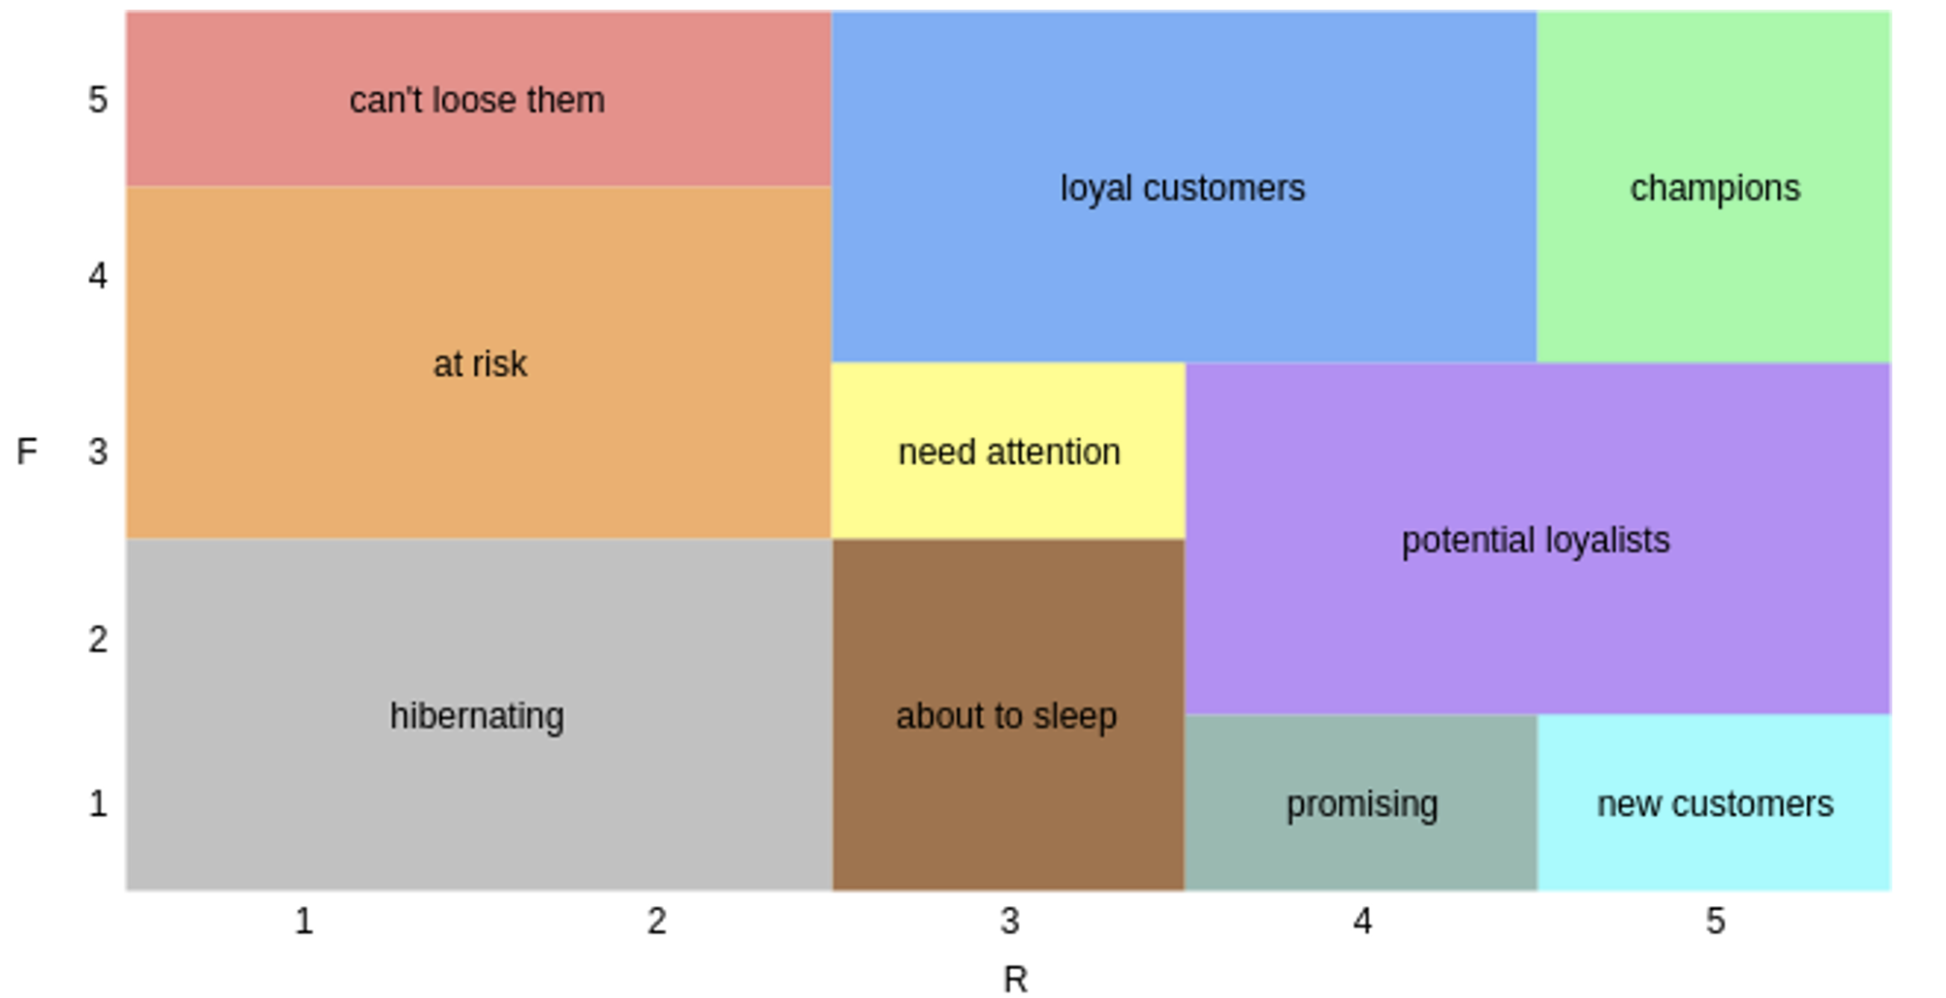

In [41]:
# Display the top 10 segments with the most customers
rfm_scores.groupby(['RFM_Score_Segment']).size().sort_values(ascending=False)[:10]

RFM_Score_Segment
555    448
111    396
455    236
211    198
222    177
122    167
344    159
444    158
333    146
544    138
dtype: int64

In [63]:
segment_mapping = {r'[1-2][1-2]': 'Hibernating',
                   r'[1-2][3-4]': 'At Risk',
                   r'[1-2]5': 'Can\'t Loose',
                   r'3[1-2]': 'About to Sleep',
                   r'33': 'Need Attention',
                   r'[3-4][4-5]': 'Loyal Customers',
                   r'41': 'Promising',
                   r'51': 'New Customers',
                   r'[4-5][2-3]': 'Potential Loyalists',
                   r'5[4-5]': 'Champions'
                  }

In [64]:
rfm_scores['Segment'] = rfm_scores['Recency_Score'].astype(str) + rfm_scores['Frequency_Score'].astype(str)

In [65]:
rfm_scores.head()

,level_0,index,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Name,Segment
0,0,0,12346.0,-64.68,48,325,2,3,1,231,6,Sliver,23
1,1,1,12347.0,5633.32,253,1,5,5,5,555,15,Gold,55
2,2,2,12348.0,2019.40,51,74,3,3,4,334,10,Gold,33
3,3,3,12349.0,4404.54,180,18,4,4,5,445,13,Gold,44
4,4,4,12350.0,334.40,17,309,2,2,2,222,6,Sliver,22


In [66]:
rfm_scores['Segment'] = rfm_scores['Segment'].replace(segment_mapping,regex=True)
#rfm_scores.reset_index(inplace=True)
rfm_scores.head()

,level_0,index,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Name,Segment
0,0,0,12346.0,-64.68,48,325,2,3,1,231,6,Sliver,At Risk
1,1,1,12347.0,5633.32,253,1,5,5,5,555,15,Gold,Champions
2,2,2,12348.0,2019.40,51,74,3,3,4,334,10,Gold,Need Attention
3,3,3,12349.0,4404.54,180,18,4,4,5,445,13,Gold,Loyal Customers
4,4,4,12350.0,334.40,17,309,2,2,2,222,6,Sliver,Hibernating


In [67]:
rfm_scores.groupby(['Segment']).agg({"Customer ID":"count"}).sort_values("Customer ID",ascending=False)

,Customer ID
Segment,
Hibernating,1463
Loyal Customers,1153
Champions,831
At Risk,806
Potential Loyalists,694
About to Sleep,427
Need Attention,273
Promising,123
Can't Loose,106


In [68]:
rfm_scores[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count","max"]).round()

Recency            Frequency              Monetary        \
                       mean count  max      mean count    max     mean count   
Segment                                                                        
About to Sleep        109.0   427  189      18.0   427     38    542.0   427   
At Risk               392.0   806  737      74.0   806    180   1201.0   806   
Can't Loose           340.0   106  595     322.0   106   2827   4342.0   106   
Champions               7.0   831   17     454.0   831  13097  10581.0   831   
Hibernating           459.0  1463  738      16.0  1463     38    310.0  1463   
Loyal Customers        64.0  1153  189     239.0  1153   1885   3895.0  1153   
Need Attention        107.0   273  189      56.0   273     77   1397.0   273   
New Customers           9.0    66   17       8.0    66     16    649.0    66   
Potential Loyalists    24.0   694   57      44.0   694     77   1125.0   694   
Promising              35.0   123   57       9.0   123     16    388.0   123   

                               
                          max  
Segment                        
About to Sleep         7244.0  
At Risk               56561.0  
Can't Loose           55703.0  
Champions            598215.0  
Hibernating           21536.0  
Loyal Customers      143269.0  
Need Attention        15909.0  
New Customers         12394.0  
Potential Loyalists   28567.0  
Promising              5120.0

### Inference

### Option-3: Interpeting Customer Segmentation using RFM_Score_Segment

In [84]:
segment_mapping = {r'[4-5][4-5][4-5]': 'Best Customers',
                   r'[1-5][4-5][1-5]': 'Loyal Customers',
                   r'[1-5][1-5][4-5]': 'Big Spenders',
                   r'[2-3][1-5][1-5]': 'Almost Lost',
                   r'[1][1-5][1-5]': 'Lost Customers',
                   r'[4-5][1-3][1-3]': 'Recent Active Low Spender',
                  }

In [85]:
rfm_scores['Segment_New'] = rfm_scores['Recency_Score'].astype(str) + rfm_scores['Frequency_Score'].astype(str)

In [86]:
rfm_scores['Segment_New'] = rfm_scores['RFM_Score_Segment'].replace(segment_mapping,regex=True)
#rfm_scores.reset_index(inplace=True)
rfm_scores.head()

,level_0,index,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Name,Segment,Segment_New
0,0,0,12346.0,-64.68,48,325,2,3,1,231,6,Sliver,At Risk,Almost Lost
1,1,1,12347.0,5633.32,253,1,5,5,5,555,15,Gold,Champions,Best Customers
2,2,2,12348.0,2019.40,51,74,3,3,4,334,10,Gold,Need Attention,Big Spenders
3,3,3,12349.0,4404.54,180,18,4,4,5,445,13,Gold,Loyal Customers,Best Customers
4,4,4,12350.0,334.40,17,309,2,2,2,222,6,Sliver,Hibernating,Almost Lost


In [87]:
rfm_scores.groupby(['Segment_New']).agg({"Customer ID":"count"}).sort_values("Customer ID",ascending=False)

,Customer ID
Segment_New,
Almost Lost,1407
Best Customers,1293
Loyal Customers,1084
Lost Customers,1014
Recent Active Low Spender,715
Big Spenders,429


### Outlier Treatment

- **Statistical Outliers:** Statistical outliers are identified based on mathematical/statistical criteria and may not have an apparent reason in the context of the data.

- **Domain specific Outliers:** Domain-specific outliers are those that have a specific meaning or relevance within the context of your dataset. These outliers might be valid data points that provide valuable insights or signal anomalies. Treating them requires domain knowledge and understanding of the data.

In [43]:
# Checking skewness values for outlier features

from scipy.stats import skew

In [48]:
skew_df = pd.DataFrame(columns=['Feature Name', 'Skewness'])

outlier_features = ['Amount','Frequency','Recency']

for feature in outlier_features:
    skewness = skew(rfm[feature])
    skew_df = skew_df._append({'Feature Name': feature, 'Skewness': skewness}, ignore_index=True)

print(skew_df)

  Feature Name   Skewness
0       Amount  21.697842
1    Frequency  18.147512
2      Recency   1.249237


**append method in pandas is now modified to _append**

### Removing Outlier using IQR method

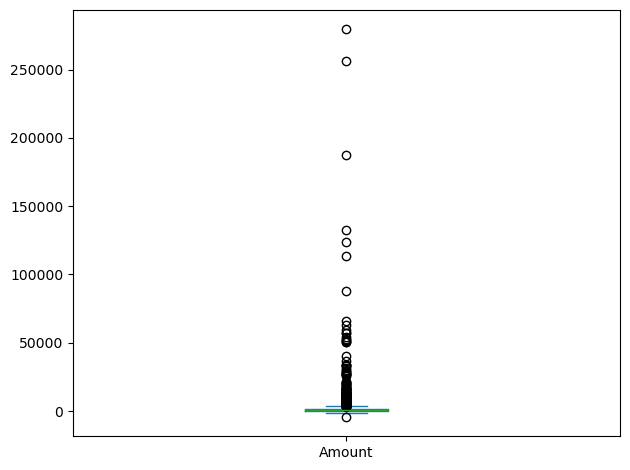

Feature name : Amount  
 Upper limit : 2051.76875  
 Lower limit : 1171.6812499999999
----------------------------------------------------------------------------------------------------


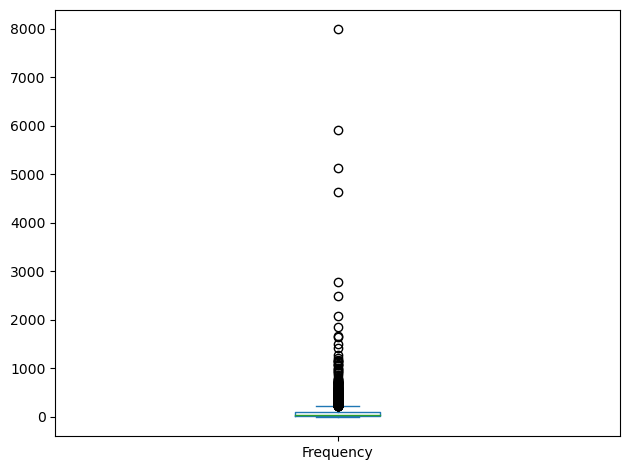

Feature name : Frequency  
 Upper limit : 127.5  
 Lower limit : 76.5
----------------------------------------------------------------------------------------------------


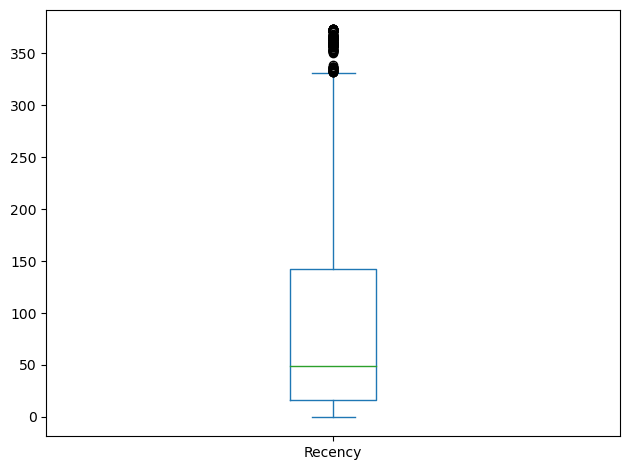

Feature name : Recency  
 Upper limit : 166.0  
 Lower limit : 118.0
----------------------------------------------------------------------------------------------------


In [49]:
for feature in outlier_features:
    rfm[feature].plot.box()
    q3 = rfm[feature].quantile(0.75)
    q1 = rfm[feature].quantile(0.25)
    iqr = q3 - q1
    upper_limit = (q3) + 1.5*(q1)
    lower_limit = (q3) - 1.5*(q1)
    plt.tight_layout()
    plt.show()
    print('Feature name : {}  \n Upper limit : {}  \n Lower limit : {}'.format(feature,upper_limit,lower_limit))
    print('-'*100)

In [51]:
rfm = rfm.loc[(rfm['Amount']<=2052) & (rfm['Amount']>=1171) & (rfm['Frequency']<=127.5) & (rfm['Frequency']>=76.5) & (rfm['Recency']<=166) & (rfm['Recency']>=118)]

In [56]:
rfm

,Customer ID,Amount,Frequency,Recency
267,12669.0,1607.73,102,150
470,12947.0,1407.29,103,143
626,13162.0,1644.99,82,121
2068,15146.0,1313.66,95,164
2160,15265.0,1506.12,82,150
2734,16045.0,1340.70,83,119
2995,16398.0,1631.15,86,144
3404,16951.0,1262.75,87,122
3633,17282.0,1703.41,94,129


qcut